In [137]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [1]:
outputPath = '/Users/geiger/Box Sync/research (YangdonglingLiu2021@u.northwestern.edu)/Data_Solstice/2020/2020-1-16'

In [140]:
wl_vis = 796
shift = 10.42
acqsnumber = 125
acqstime = 20

In [141]:
def plotspectrum(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    ymax = max(y[150:300])
    plt.xlim(2600, 3100)
    plt.ylim(-50, ymax+50)
    plt.xlabel('Vibrational Frequency [cm-1]')
    plt.ylabel('Intensity')
    plt.show()

## Import Background and Gold

In [45]:
bgFile = pd.read_csv(outputPath+'/au/3700_bg.txt',sep='\t',header=None,names=['wavelength','a','b','bg'])[['wavelength','bg']]
bgFile[['wncalib']] = 1e7/bgFile[['wavelength']]-1e7/wl_vis - shift
bgFile

,wavelength,bg,wncalib
0,631.029,585,3258.095872
1,631.115,596,3255.936434
2,631.201,598,3253.777585
3,631.288,589,3251.594232
4,631.374,597,3249.436566
...,...,...,...
439,668.327,592,2373.698956
440,668.411,607,2371.818571
441,668.494,611,2369.961036
442,668.578,604,2368.081591


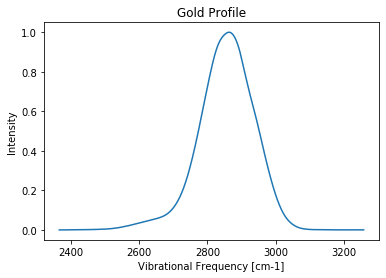

,raw,au,ausmooth,aunorm
0,618,33,31,0.000733
1,623,27,30,0.000709
2,620,22,30,0.000709
3,637,48,30,0.000709
4,632,35,29,0.000686
...,...,...,...,...
439,623,31,17,0.000402
440,612,5,16,0.000378
441,614,3,16,0.000378
442,616,12,15,0.000355


In [59]:
goldFile = pd.read_csv(outputPath+'/au/3500.txt',sep='\t',header=None,names=['wavelength','a','b','raw'])[['raw']]
goldFile['au'] = goldFile['raw'] - bgFile['bg']
goldFile['ausmooth'] = gaussian_filter1d(goldFile['au'], 5)
goldFile['aunorm'] = goldFile['ausmooth']/max(goldFile['ausmooth'])
plotspectrum(bgFile['wncalib'],goldFile['aunorm'], 'Gold Profile')
goldFile

## Import Sample

In [108]:
sampleFileRaw = pd.read_csv(outputPath+'/squalene_sc_extflow/track_wetO3flow_ssp_3500_10sx244.txt',sep='\t', header=None).transpose()
# sampleFile['signal'] = sampleFile['raw'] - bgFile['bg']
# goldFile['au'] = goldFile['raw'] - bgFile['bg']
# plotspectrum(bgFile['wncalib'],sampleFile['signal'], 'Sample')
sampleFileRaw.drop(sampleFileRaw.columns[[0,1,2]],axis=1,inplace=True)
sampleFileRaw.drop([0,1,446],axis=0,inplace=True)
sampleFileRaw.index = range(444)
sampleFileRaw.columns = range(1,acqsnumber+1)
sampleFileRaw

,1,2,3,4,5,6,7,8,9,10,...,235,236,237,238,239,240,241,242,243,244
0,586,582,581,588,588,580,583,588,605,585,...,595,585,595,590,592,584,575,584,578,577
1,592,587,594,583,593,587,583,583,586,595,...,579,583,582,585,582,590,592,591,589,578
2,599,579,593,590,599,581,597,593,591,592,...,598,597,590,590,585,597,587,594,597,587
3,597,597,597,593,598,596,596,582,601,599,...,595,593,591,600,599,600,602,597,594,601
4,602,583,600,601,601,594,598,593,598,599,...,598,603,620,601,607,597,610,594,601,599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,604,601,599,608,592,613,607,608,605,612,...,605,609,592,604,605,604,601,599,604,600
440,610,597,605,600,605,602,605,606,608,617,...,605,606,601,601,599,600,592,611,598,612
441,607,600,600,600,608,607,604,601,609,611,...,588,597,606,602,607,618,599,599,610,609
442,599,613,609,605,604,606,600,601,596,604,...,607,603,595,596,602,616,607,603,603,595


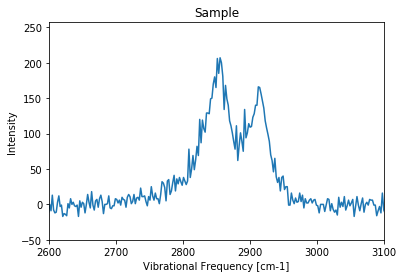

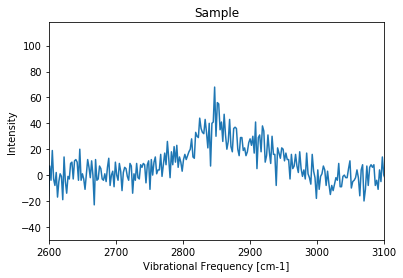

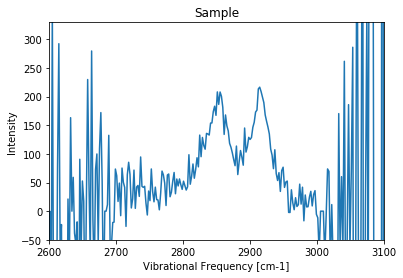

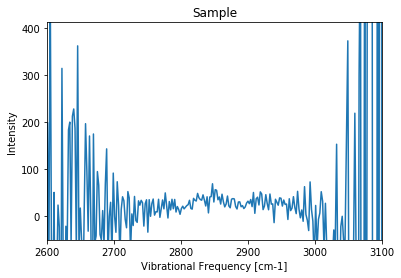

In [110]:
sampleFile = sampleFileRaw.sub(bgFile['bg'], axis=0)
plotspectrum(bgFile['wncalib'],sampleFile[1],"Sample")
plotspectrum(bgFile['wncalib'],sampleFile[acqsnumber],"Sample")

sampleFileNorm = sampleFile.div(goldFile['aunorm'],axis=0)
plotspectrum(bgFile['wncalib'],sampleFileNorm[1],"Sample")
plotspectrum(bgFile['wncalib'],sampleFileNorm[acqsnumber],"Sample")

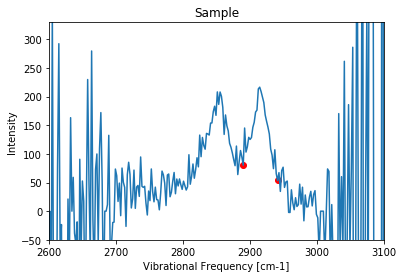

In [123]:
index1 = 150
index2 =175

plt.scatter([bgFile['wncalib'][index1],bgFile['wncalib'][index2]],[sampleFileNorm[1][index1],sampleFileNorm[1][index2]],color='r')
plotspectrum(bgFile['wncalib'],sampleFileNorm[1],"Sample")


In [124]:
sampleFileNorm

,1,2,3,4,5,6,7,8,9,10,...,235,236,237,238,239,240,241,242,243,244
0,1364,-4092,-5456,4092,4092,-6820,-2728,4092,27280,0,...,13640,0,13640,6820,9548,-1364,-13640,-1364,-9548,-10912
1,-5637.87,-12685.2,-2818.93,-18323.1,-4228.4,-12685.2,-18323.1,-18323.1,-14094.7,-1409.47,...,-23960.9,-18323.1,-19732.5,-15504.1,-19732.5,-8456.8,-5637.87,-7047.33,-9866.27,-25370.4
2,1409.47,-26779.9,-7047.33,-11275.7,1409.47,-23960.9,-1409.47,-7047.33,-9866.27,-8456.8,...,0,-1409.47,-11275.7,-11275.7,-18323.1,-1409.47,-15504.1,-5637.87,-1409.47,-15504.1
3,11275.7,11275.7,11275.7,5637.87,12685.2,9866.27,9866.27,-9866.27,16913.6,14094.7,...,8456.8,5637.87,2818.93,15504.1,14094.7,15504.1,18323.1,11275.7,7047.33,16913.6
4,7290.34,-20413,4374.21,5832.28,5832.28,-4374.21,1458.07,-5832.28,1458.07,2916.14,...,1458.07,8748.41,33535.6,5832.28,14580.7,0,18954.9,-4374.21,5832.28,2916.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,29847.5,22385.6,17411.1,39796.7,0,52233.2,37309.4,39796.7,32334.8,49745.9,...,32334.8,42284,0,29847.5,32334.8,29847.5,22385.6,17411.1,29847.5,19898.4
440,7928.25,-26427.5,-5285.5,-18499.2,-5285.5,-13213.8,-5285.5,-2642.75,2642.75,26427.5,...,-5285.5,-2642.75,-15856.5,-15856.5,-21142,-18499.2,-39641.2,10571,-23784.8,13213.8
441,-10571,-29070.2,-29070.2,-29070.2,-7928.25,-10571,-18499.2,-26427.5,-5285.5,0,...,-60783.2,-36998.5,-13213.8,-23784.8,-10571,18499.2,-31713,-31713,-2642.75,-5285.5
442,-14094.7,25370.4,14094.7,2818.93,0,5637.87,-11275.7,-8456.8,-22551.5,0,...,8456.8,-2818.93,-25370.4,-22551.5,-5637.87,33827.2,8456.8,-2818.93,-2818.93,-25370.4


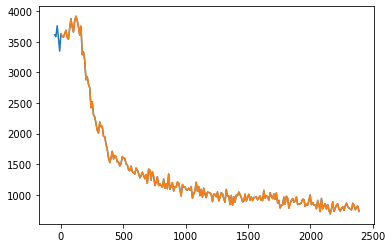

In [136]:
area_trace = sampleFileNorm.iloc[index1:(index2+1)].sum(axis=0)
time_trace = np.linspace(-5*acqstime,(acqsnumber-5)*acqstime, acqsnumber)
area_trace2 = sampleFileNorm.iloc[index1:(index2+1)].sum(axis=0)[5:]
time_trace2 = np.linspace(-5*acqstime,(acqsnumber-5)*acqstime, acqsnumber)[5:]
plt.plot(time_trace, area_trace)
plt.plot(time_trace2, area_trace2)
plt.show()

In [139]:
# output file
name = 'kineticdata_wetozone'
print('kinetic data written to',name)

os.chdir(outputPath)
data = np.vstack((time_trace,area_trace)).transpose()
np.savetxt(name,data,delimiter=',',header='time,area',comments='')

kinetic data written to kineticdata_wetozone
